## Amazon Comprehend

* 자연어 텍스트에서 다양한 정보를 추출하기 위한 서비스입니다. 
* 서비스 종류
    * 자연어 식별(영어인지 한국어인지)
    * 핵심 문구 추출
    * 장소, 인물, 브랜드, 이벤트와 같은 엔티티(Entity)추출
    * 감정(Sentiment)추출(긍정 or 부정)

IAM에서 Comprehend에 대한 접근 권한을 사용자에게 부여해야함

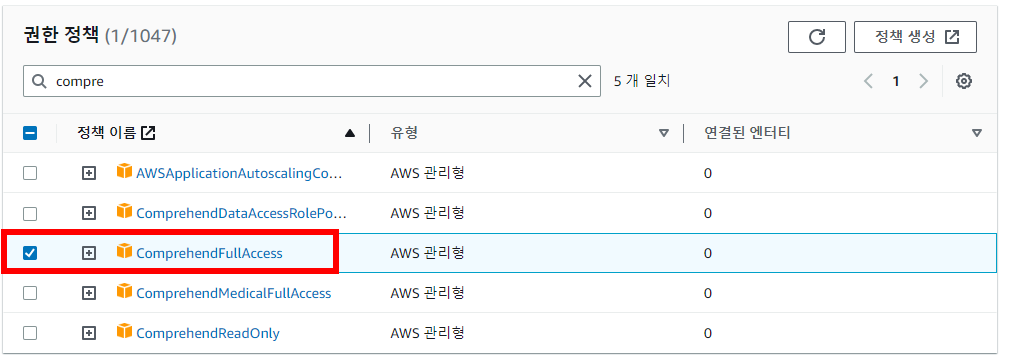

### 자연어 식별하기


https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/comprehend/client/detect_dominant_language.html

In [1]:
import boto3
import json

client = boto3.client('comprehend', region_name='ap-northeast-2')

text = '귀사의 기자가 기차로 귀사 했다'

#텍스트의 언어 종류는?
response = client.detect_dominant_language(Text=text)
print(json.dumps(response, indent=2))

{
  "Languages": [
    {
      "LanguageCode": "ko",
      "Score": 0.7647058963775635
    }
  ],
  "ResponseMetadata": {
    "RequestId": "3c51a988-1101-4155-a390-a3b9fca77276",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "x-amzn-requestid": "3c51a988-1101-4155-a390-a3b9fca77276",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "64",
      "date": "Tue, 04 Apr 2023 03:35:20 GMT"
    },
    "RetryAttempts": 0
  }
}


In [2]:
#인식결과는?

language = response['Languages'][0]['LanguageCode']
score = response['Languages'][0]['Score']

print(f'사용언어: {language}, 신뢰도:{score:.2f}')

사용언어: ko, 신뢰도:0.76


In [3]:
import boto3
import json

client = boto3.client('comprehend', region_name='ap-northeast-2')

text = 'コーディングは楽しい仕事です'

#텍스트의 언어 종류는?
response = client.detect_dominant_language(Text=text)

language = response['Languages'][0]['LanguageCode']
score = response['Languages'][0]['Score']

print(f'사용언어: {language}, 신뢰도:{score:.2f}')

사용언어: ja, 신뢰도:1.00


In [4]:
import boto3
import json

client = boto3.client('comprehend', region_name='ap-northeast-2')

text = 'البرمجة ممتعة.'

#텍스트의 언어 종류는? (아랍어)
response = client.detect_dominant_language(Text=text)

language = response['Languages'][0]['LanguageCode']
score = response['Languages'][0]['Score']

print(f'사용언어: {language}, 신뢰도:{score:.2f}')

사용언어: ar, 신뢰도:1.00


### 엔티티 추출하기

* 개체명 인식(Named Entity Recognition)이란 말 그대로 이름을 가진 개체(named entity)를 인식하겠다는 것을 의미합니다. 
* NER의 정의는 한국정보통신기술협회가 제공하는 정보통신용어사전에 따르면 다음과 같습니다.

* 미리 정의해 둔 사람, 회사, 장소, 시간, 단위 등에 해당하는 단어(개체명)를 문서에서 인식하여 추출 분류하는 기법. 
* 추출된 개체명은 인명(person), 지명(location), 기관명(organization), 시간(time) 등으로 분류된다. 
* 개체명 인식(NER)은 정보 추출을 목적으로 시작되어 자연어 처리, 정보 검색 등에 사용된다. 

**[NER이 필요한 이유]**
* 예) 'TWIGFARM'을 글자 그대로 해석하면 ‘트위그팜’이 아닌 ‘나뭇가지 농장’이라고 해석됩니다. 
* 그런데 이러면 번역 오류가 일어날 뿐만 아니라 사용자에게도 불편한 경험을 안겨줄 수 있습니다. 
* 반면 TWIGFARM을 회사명으로 제대로 인식할 수 있다면, 번역 품질 뿐만 아니라 사용자 경험까지도 함께 향상될 수 있습니다.


https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/comprehend/client/detect_entities.html

In [5]:
import boto3
import json

text = '''Amazon Comprehend는 기계학습을 사용하여 텍스트 안에서 인사이트(Insight, 통찰)나 관계성을 검출하는 자연어처리(NLP) 서비스입니다. 기계학습 경험은 필요 없습니다.

구조화되지 않은 데이터에는 엄청난 보물이 숨겨져 있습니다. 고객 이메일, 지원 티켓(Support Ticket), 제품 리뷰, 소셜 미디어, 광고 카피가 비즈니스에 도움이 되는 고객 감정 인사이트를 나타냅니다.
문제는 그것을 어떻게 얻느냐 하는 것입니다. 이와 같이 기계학습은 방대한 사이즈의 텍스트 안에서 특정한 관심 항목(애널리스트 리포트에서 회사 이름 찾기 등)을 정확하게 특정해 내는 것에 특히 뛰어나며, 언어 속에 숨겨진 감정(부정적인 리뷰 및 고객 서비스 에이전트와 고객의 적극적인 거래 특징)을 거의 무한한 규모로 학습할 수 있습니다.'''

response = client.detect_entities(Text=text, LanguageCode='ko')
print(json.dumps(response, indent=2, ensure_ascii=False))

{
  "Entities": [
    {
      "Score": 0.6947488188743591,
      "Type": "ORGANIZATION",
      "Text": "Amazon",
      "BeginOffset": 0,
      "EndOffset": 6
    },
    {
      "Score": 0.3868648111820221,
      "Type": "TITLE",
      "Text": "Comprehend",
      "BeginOffset": 7,
      "EndOffset": 17
    },
    {
      "Score": 0.7002522349357605,
      "Type": "OTHER",
      "Text": "NLP",
      "BeginOffset": 73,
      "EndOffset": 76
    }
  ],
  "ResponseMetadata": {
    "RequestId": "56254f8e-db75-4f34-907c-ad5dc25ce05d",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "x-amzn-requestid": "56254f8e-db75-4f34-907c-ad5dc25ce05d",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "295",
      "date": "Tue, 04 Apr 2023 03:35:20 GMT"
    },
    "RetryAttempts": 0
  }
}


In [6]:
import boto3
import json

text = '''서경덕 성신여대 교수는 각종 영상 콘텐츠를 불법으로 유통하는 사이트 '누누티비'의 비정상적인 시청이 문제가 되자 "시민의식이 뒤따라야 한다"고 일침을 놓았다.

서 교수는 20일 사회관계망서비스(SNS)에 "우리 문화를 우리 스스로가 보호하지 않으면 누가 지켜주느냐"며 이 같이 밝혔다.

'누누티비'는 2021년부터 해외에 서버를 두고 국내 온라인 동영상 서비스(OTT) 콘텐츠와 드라마, 영화 등을 불법으로 제공한다.'''

response = client.detect_entities(Text=text, LanguageCode='ko')
print(json.dumps(response, indent=2, ensure_ascii=False))

{
  "Entities": [
    {
      "Score": 0.9968536496162415,
      "Type": "PERSON",
      "Text": "서경덕",
      "BeginOffset": 0,
      "EndOffset": 3
    },
    {
      "Score": 0.6894819736480713,
      "Type": "ORGANIZATION",
      "Text": "성신여대",
      "BeginOffset": 4,
      "EndOffset": 8
    },
    {
      "Score": 0.9810958504676819,
      "Type": "PERSON",
      "Text": "교수",
      "BeginOffset": 9,
      "EndOffset": 11
    },
    {
      "Score": 0.5992798209190369,
      "Type": "TITLE",
      "Text": "누누티비",
      "BeginOffset": 39,
      "EndOffset": 43
    },
    {
      "Score": 0.9903725385665894,
      "Type": "PERSON",
      "Text": "서",
      "BeginOffset": 90,
      "EndOffset": 91
    },
    {
      "Score": 0.9730229377746582,
      "Type": "PERSON",
      "Text": "교수",
      "BeginOffset": 92,
      "EndOffset": 94
    },
    {
      "Score": 0.9958645105361938,
      "Type": "DATE",
      "Text": "20일",
      "BeginOffset": 96,
      "EndOffset": 99
    },
    {


In [7]:
response['Entities']

[{'Score': 0.9968536496162415,
  'Type': 'PERSON',
  'Text': '서경덕',
  'BeginOffset': 0,
  'EndOffset': 3},
 {'Score': 0.6894819736480713,
  'Type': 'ORGANIZATION',
  'Text': '성신여대',
  'BeginOffset': 4,
  'EndOffset': 8},
 {'Score': 0.9810958504676819,
  'Type': 'PERSON',
  'Text': '교수',
  'BeginOffset': 9,
  'EndOffset': 11},
 {'Score': 0.5992798209190369,
  'Type': 'TITLE',
  'Text': '누누티비',
  'BeginOffset': 39,
  'EndOffset': 43},
 {'Score': 0.9903725385665894,
  'Type': 'PERSON',
  'Text': '서',
  'BeginOffset': 90,
  'EndOffset': 91},
 {'Score': 0.9730229377746582,
  'Type': 'PERSON',
  'Text': '교수',
  'BeginOffset': 92,
  'EndOffset': 94},
 {'Score': 0.9958645105361938,
  'Type': 'DATE',
  'Text': '20일',
  'BeginOffset': 96,
  'EndOffset': 99},
 {'Score': 0.6129259467124939,
  'Type': 'ORGANIZATION',
  'Text': '누누티비',
  'BeginOffset': 163,
  'EndOffset': 167},
 {'Score': 0.998400866985321,
  'Type': 'DATE',
  'Text': '2021년',
  'BeginOffset': 170,
  'EndOffset': 175}]

### 감정인식

https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/comprehend/client/detect_sentiment.html

네이버 영화 리뷰 감성분석 참고

https://wikidocs.net/44249

In [8]:
import boto3
import json

text = '''이 영화 개꿀잼 ㅋㅋㅋ'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.9979337453842163,
  'Negative': 0.0002390017471043393,
  'Neutral': 0.0017995006637647748,
  'Mixed': 2.774318818410393e-05},
 'ResponseMetadata': {'RequestId': '0e20cdf9-d2e6-4eb3-876e-560f78790a50',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '0e20cdf9-d2e6-4eb3-876e-560f78790a50',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '166',
   'date': 'Tue, 04 Apr 2023 03:35:20 GMT'},
  'RetryAttempts': 0}}

In [9]:
import boto3
import json

text = '''이 영화 핵노잼 ㅠㅠ'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'NEGATIVE',
 'SentimentScore': {'Positive': 0.010632588528096676,
  'Negative': 0.97006756067276,
  'Neutral': 0.01928439736366272,
  'Mixed': 1.5446596080437303e-05},
 'ResponseMetadata': {'RequestId': 'fcd3ddee-de6b-449c-bafc-9351fe92853d',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'fcd3ddee-de6b-449c-bafc-9351fe92853d',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '163',
   'date': 'Tue, 04 Apr 2023 03:35:20 GMT'},
  'RetryAttempts': 0}}

In [10]:
import boto3
import json

text = '''이딴게 영화냐 ㅉㅉ'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'NEGATIVE',
 'SentimentScore': {'Positive': 0.0016437004087492824,
  'Negative': 0.7624475359916687,
  'Neutral': 0.23577746748924255,
  'Mixed': 0.00013129611033946276},
 'ResponseMetadata': {'RequestId': 'd6d245fe-712a-4352-a593-f39b9ae85925',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'd6d245fe-712a-4352-a593-f39b9ae85925',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '166',
   'date': 'Tue, 04 Apr 2023 03:35:20 GMT'},
  'RetryAttempts': 0}}

In [11]:
import boto3
import json

text = '''와 개쩐다 정말 세계관 최강자들의 영화다'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.9568604230880737,
  'Negative': 0.010443524457514286,
  'Neutral': 0.03177961707115173,
  'Mixed': 0.0009163980139419436},
 'ResponseMetadata': {'RequestId': 'ffd98ebe-240b-4e81-9513-31f040e5abc0',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'ffd98ebe-240b-4e81-9513-31f040e5abc0',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '164',
   'date': 'Tue, 04 Apr 2023 03:35:20 GMT'},
  'RetryAttempts': 0}}

In [12]:
import boto3
import json

text = '''감독 뭐하는 놈이냐?'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Positive': 0.00024045156897045672,
  'Negative': 0.42978668212890625,
  'Neutral': 0.5697022676467896,
  'Mixed': 0.0002706082595977932},
 'ResponseMetadata': {'RequestId': '8f95d910-1189-4efa-9f2a-b4ea87041b3f',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '8f95d910-1189-4efa-9f2a-b4ea87041b3f',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '164',
   'date': 'Tue, 04 Apr 2023 03:35:20 GMT'},
  'RetryAttempts': 0}}

In [13]:
import boto3
import json

text = '''사계절이...겨울도 아닌...겨울에도 맘놓고 편안하게 연습하고 훈력하는 공간이 충분히 보장 되어지지 않는데 세계정상에 오른다는건...레알 갓레전드임!!!!먹고살기 힘든 요즘이지만,... 저렇게 열심히 최선을 다해~~~개한민국의 위상을 높이는 운동선수들에게'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.5487557649612427,
  'Negative': 0.0039018646348267794,
  'Neutral': 0.06537457555532455,
  'Mixed': 0.38196778297424316},
 'ResponseMetadata': {'RequestId': '4a03321c-4785-4c02-ac5d-cc378b1e27fc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '4a03321c-4785-4c02-ac5d-cc378b1e27fc',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '164',
   'date': 'Tue, 04 Apr 2023 03:35:20 GMT'},
  'RetryAttempts': 0}}

In [14]:
import boto3
import json

text = '''예빈아 사랑해~!'''

response = client.detect_sentiment(Text=text, LanguageCode='ko')
response

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.9996311664581299,
  'Negative': 2.5909483156283386e-05,
  'Neutral': 0.00032606071908958256,
  'Mixed': 1.6858351955306716e-05},
 'ResponseMetadata': {'RequestId': 'b58844e1-189f-405c-87e0-eca616e2b1f5',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'b58844e1-189f-405c-87e0-eca616e2b1f5',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '168',
   'date': 'Tue, 04 Apr 2023 03:35:21 GMT'},
  'RetryAttempts': 0}}